In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [115]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [116]:
# drop unnecessary column
df.drop(columns=['Id'],axis=1,inplace=True)

In [117]:
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [118]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [120]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [121]:
# convert the "Bare_Nuclei" to integer as that is integer column
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'],errors='coerce')

In [122]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [124]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

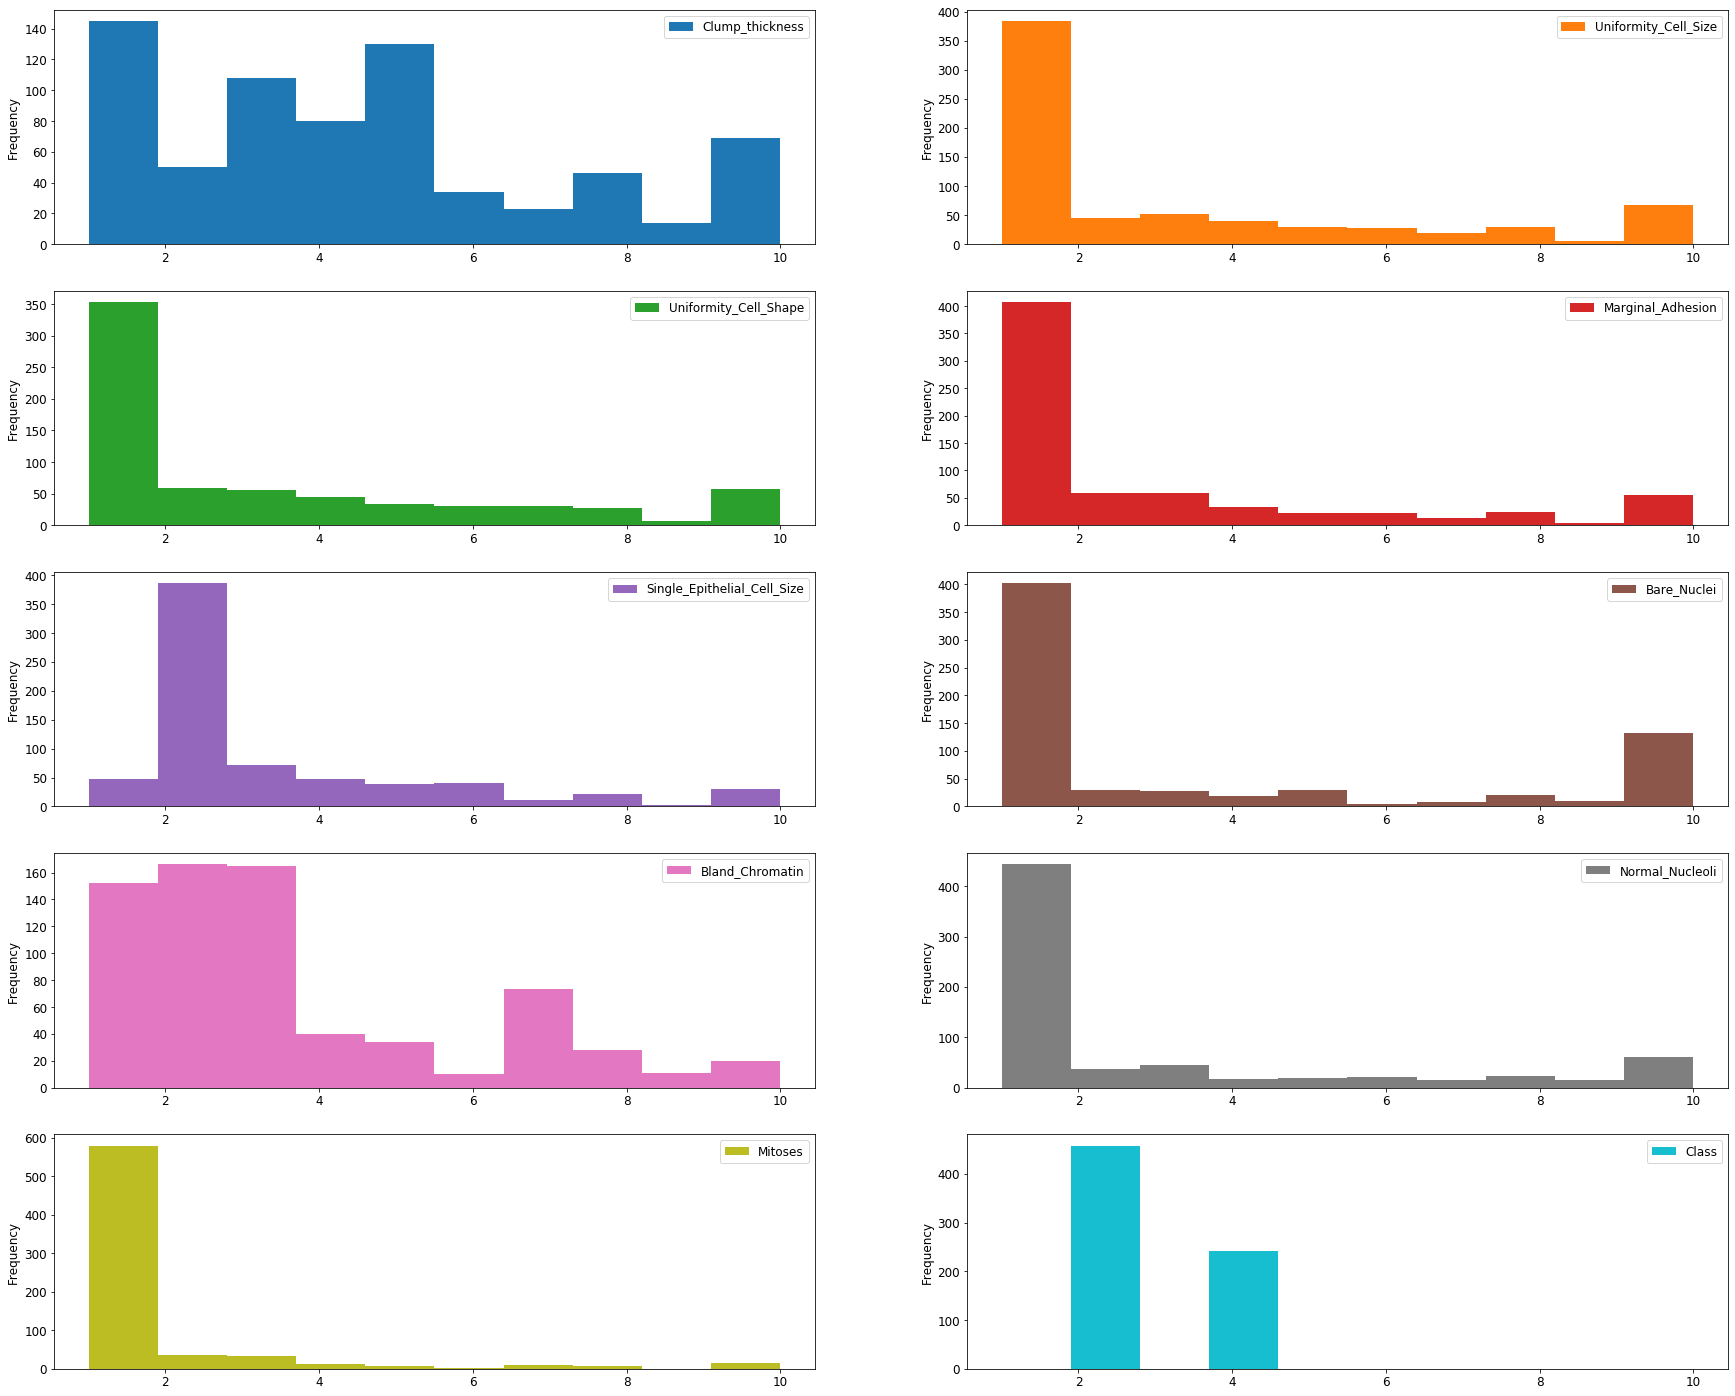

In [125]:
# Ditribution of variables
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [139]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

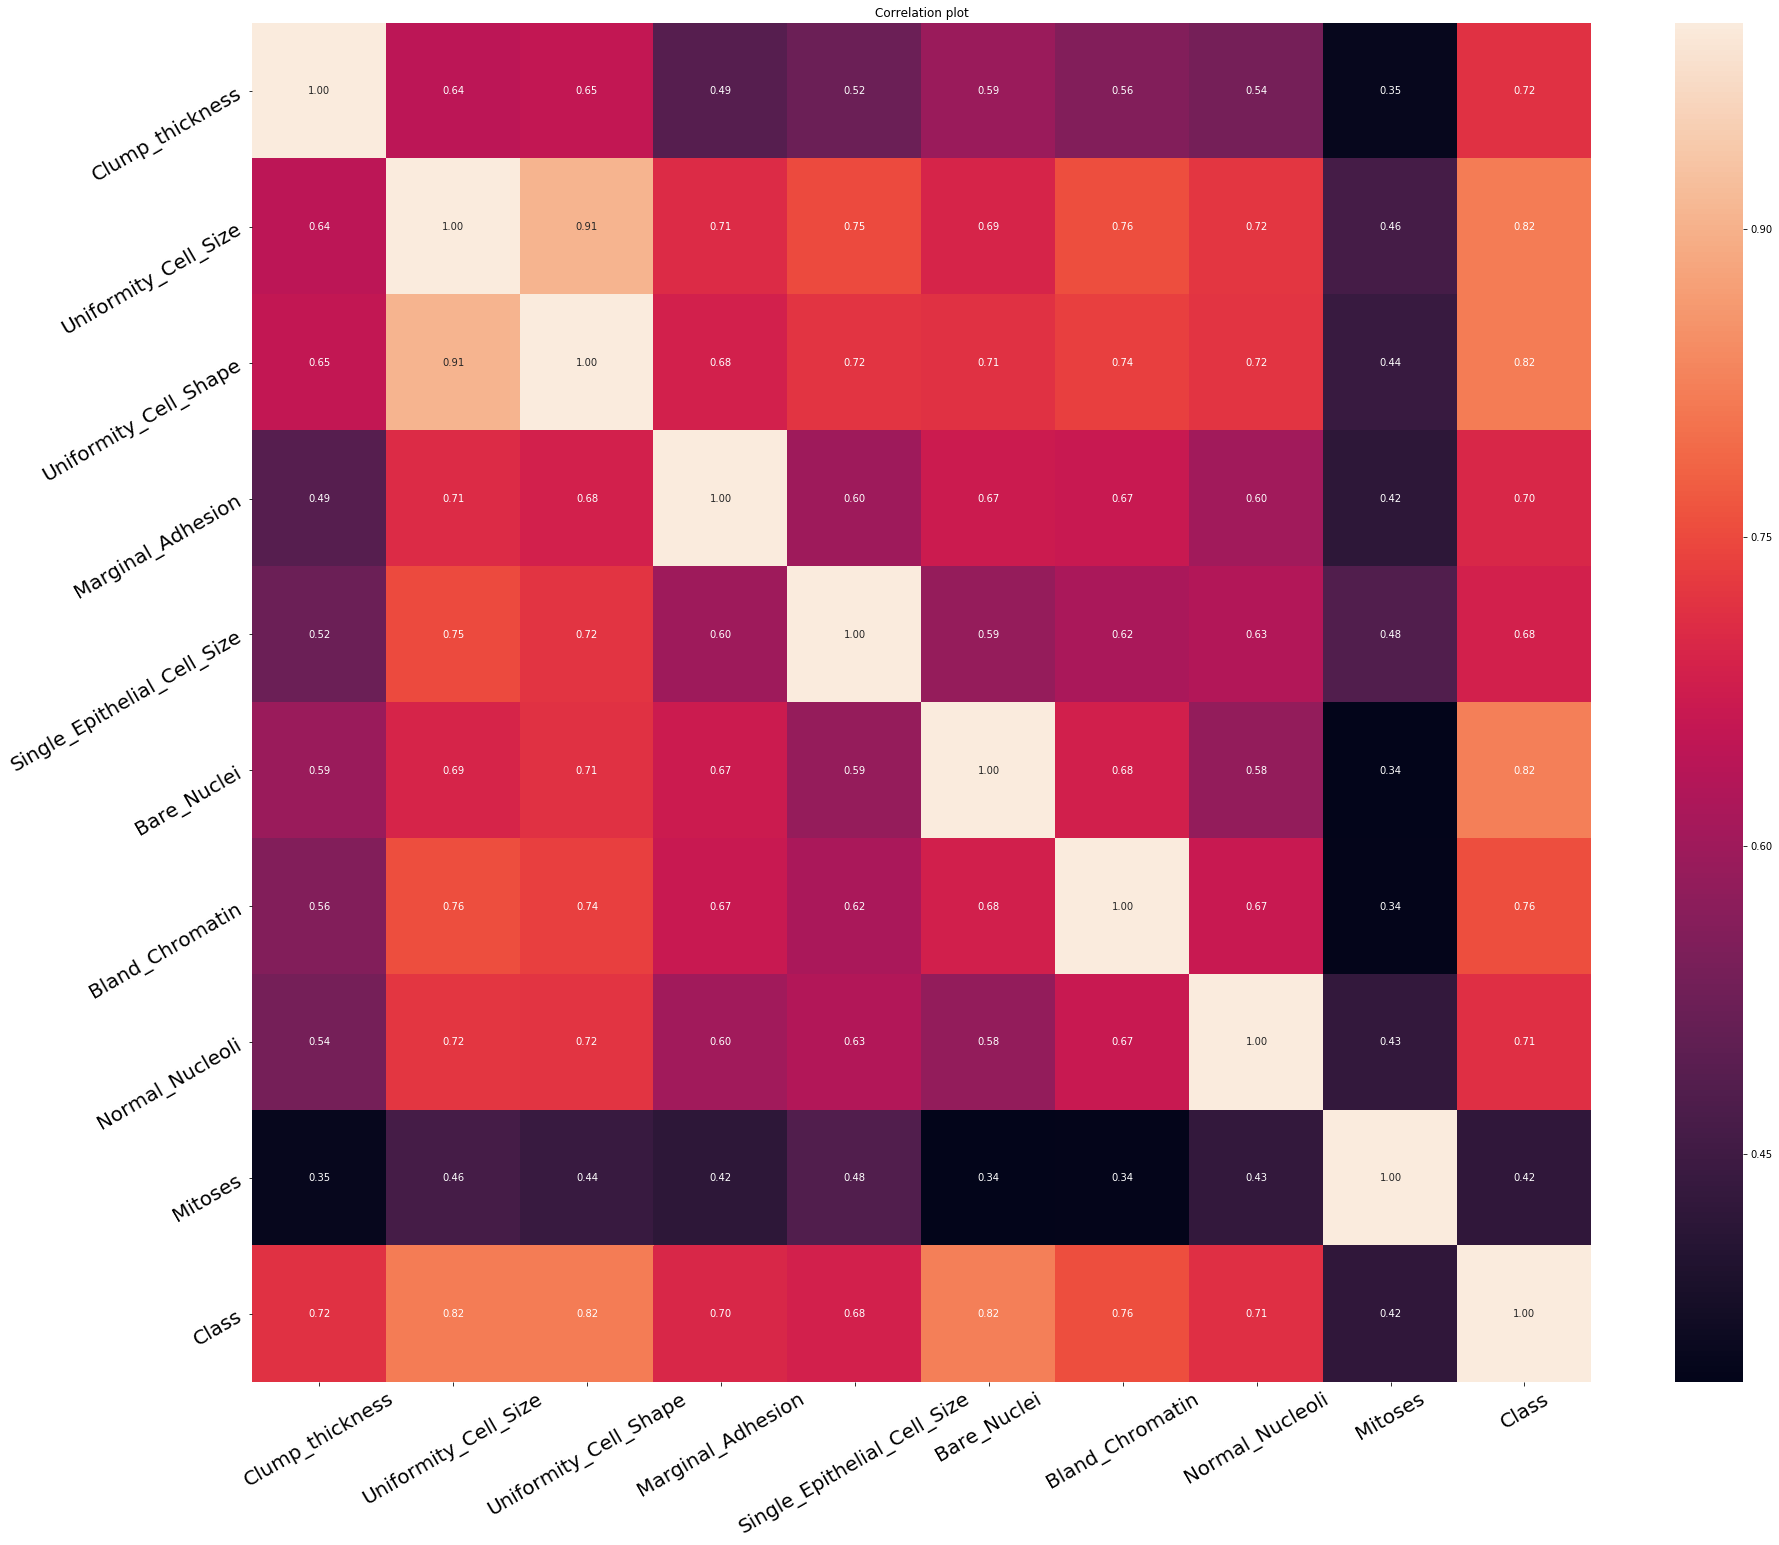

In [37]:
# KNN is robust to outlier

# Correlation plot
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='white')
plt.title("Correlation plot")
plt.xticks(rotation=30,fontsize=20)
plt.yticks(rotation=30,fontsize=20)
plt.show()

In [126]:
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into Train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [128]:
# Imputation on the basis for X_train and then impute for X_test
# lets go for median imputation
median_vals = X_train.median()
X_train = X_train.fillna(median_vals)
X_test = X_test.fillna(median_vals)

In [129]:
X_train.isnull().sum().sum()

0

In [130]:
X_test.isnull().sum().sum()

0

In [132]:
# As KNN is built on distance so scaling of data is necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:,:] = scaler.fit_transform(X_train)
X_test.iloc[:,:] = scaler.transform(X_test)

In [133]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
62,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
485,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
422,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
332,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [134]:
# Lets go for modelling now
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [135]:
y_pred = model.predict(X_test)

In [136]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
print(f"Accuracy of KNN model with 3 neighbours: {np.round(accuracy_score(y_pred,y_test),2)}")

Accuracy of KNN model with 3 neighbours: 0.97


In [137]:
# Check for overfitting and underfitting
print(f"Training Accuracy of KNN model with 3 neighbours: {np.round(accuracy_score(model.predict(X_train),y_train),2)}")
print(f"Testing Accuracy of KNN model with 3 neighbours: {np.round(accuracy_score(y_pred,y_test),2)}")

Training Accuracy of KNN model with 3 neighbours: 0.98
Testing Accuracy of KNN model with 3 neighbours: 0.97


In [138]:
# For different values of N

n = range(1,10,2)
accu_score = []
for i in n:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu_score.append(accuracy_score(y_pred,y_test))
    
accu_score

[0.9571428571428572,
 0.9714285714285714,
 0.9714285714285714,
 0.9785714285714285,
 0.9714285714285714]

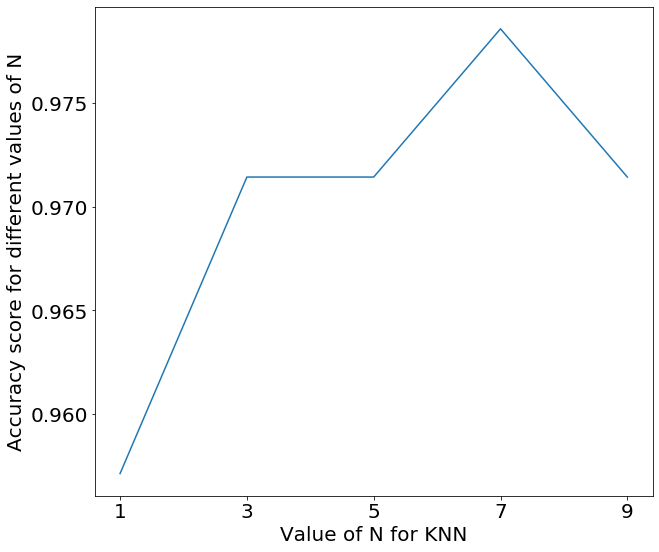

In [88]:
# Plot the accuracy against all the values
plt.figure(figsize=(10,9))
n_values=list(range(1,10,2))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(n_values,accu_score)
plt.xticks(list(range(1,10,2)),fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Value of N for KNN',fontsize=20)
plt.ylabel('Accuracy score for different values of N',fontsize=20)
plt.show()

In [65]:
# 7 is the best value of n
# so lets build the final model

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

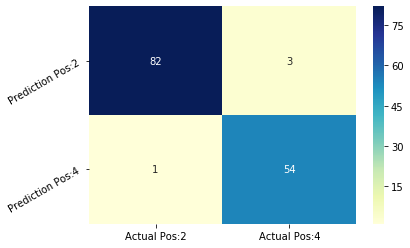

In [101]:
# visualization using confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,4))
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Actual Pos:2','Actual Pos:4'],
                    index=['Prediction Pos:2','Prediction Pos:4'])
sns.heatmap(df_cm,annot=True,cmap='YlGnBu')
plt.yticks(rotation=30)

In [100]:
# confusion report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



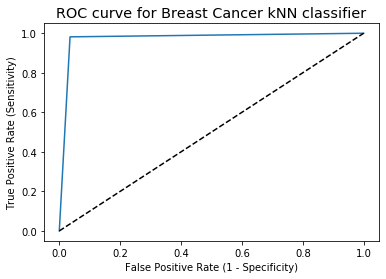

In [108]:
# the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [111]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9732620320855616

In [112]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train, y_train, cv=5, scoring='roc_auc').mean()

0.9909738956595288